<a href="https://colab.research.google.com/github/Nurpitadewi20/Kelas-Mahir-Pejuang-Data-2.0/blob/main/Nurpita_Dewi_1900015010_MPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Mengakses dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nurpitadewi20/Kelas-Mahir-Pejuang-Data-2.0/main/heart.csv')
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Memahami dataset

age = umur

sex = jenis kelamin

cp = jenis nyeri

trestbps = tekanan darah

chol = kolestrol dalam mg/dl

fbs = gula darah > 120 mg/dl

restecg = hasil elektrokardiografi istirahat (nilai 0,1,2)

thalach = detak jantung maksimum tercapai

exang = latihan angina yang diinduksi

oldpeak = Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat

slope = kemiringan puncak segmen ST

ca = jumlah kapal besar (0-3) yang diwarnai dengan tepung

thal = 3 = normal; 6 = cacat tetap; 7 = cacat yang dapat dibalik



#**Eksploratory Data Analysis**

### Dimensi Data

In [3]:
df.shape

(303, 14)

Artinya kita memiliki data dengan 14 kolom dan 303 baris dimana dataset tersebut terdiri dari 303 observasi dan 14 karakteristik


### Variabel Pada Dataset

In [4]:
df.columns.values 

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

Melabeli setiap kolom sesuai dengan ketetuan dataset, dimana terdapat 23 variabel


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df['exang']=pd.to_numeric(df['exang'],errors='coerce')

Data hanya memiliki type float dan object pada data yang ada dalam variabel setiap dataset



In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data diatas yang tidak memiliki missing data yaitu pada variabel date dan location

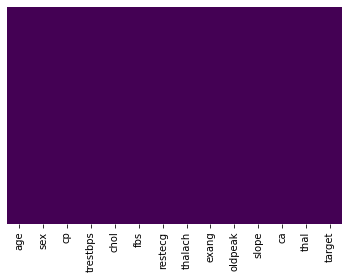

In [9]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

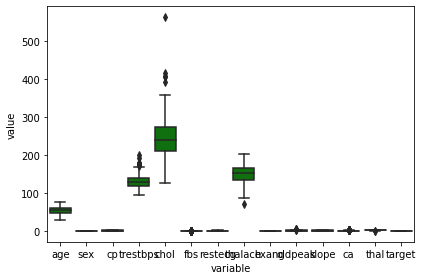

In [10]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()


### Melihat Korelasi Data

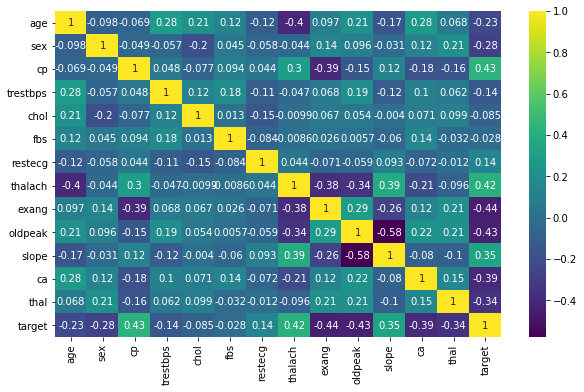

In [11]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Warna kuning mewakili korelasi positif sedangkan warna selain kuning mewakili korelasi negatif.

### Melihat Statistik Data

In [12]:
#Kodifikasi untuk data bertipe kategori
df=pd.get_dummies(df, drop_first=True)

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Menunjukan rangkuman statistika seperti nilai rata-rata, minimum, maksium

### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

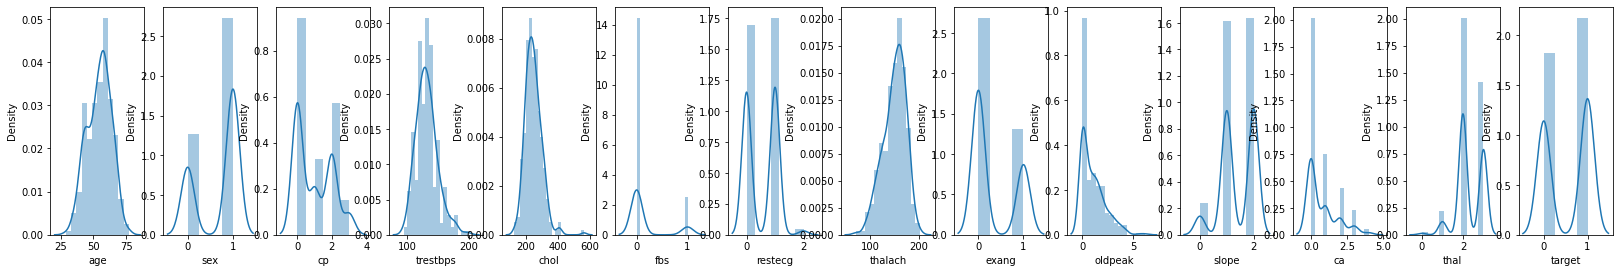

In [14]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. 



#**Data Preprocessing**

### Seleksi Kolom

In [15]:
df=df.drop(columns=['age', 'sex'])
df.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df=df.fillna(df.mean())
df.isnull().sum()

cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Menghapus outlier

Outlier adalah data yang berbeda dari data lainnya

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [17]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [18]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,120,354,0,1,163,1,0.6,2,0,2,1
5,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,124,197,0,1,136,1,0.0,1,0,2,0
298,0,140,241,0,1,123,1,0.2,1,0,3,0
299,3,110,264,0,1,132,0,1.2,1,0,3,0
301,0,130,131,0,1,115,1,1.2,1,1,3,0


### Normalisasi Data

Normalisasi perlu dilakukan untuk tujuan menghilangkan dan mengurangi redudansi data dan tujuan yang kedua adalah memastikan dependensi data (Data berada pada tabel yang tepat)




In [19]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.666667,0.473684,0.519651,0.0,0.5,0.868421,0.0,0.875,0.0,0.0,0.5,1.0
1,0.333333,0.473684,0.318777,0.0,0.0,0.736842,0.0,0.350,1.0,0.0,0.5,1.0
2,0.333333,0.342105,0.458515,0.0,0.5,0.789474,0.0,0.200,1.0,0.0,0.5,1.0
3,0.000000,0.342105,0.973799,0.0,0.5,0.657895,1.0,0.150,1.0,0.0,0.5,1.0
4,0.000000,0.605263,0.266376,0.0,0.5,0.526316,0.0,0.100,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.000000,0.394737,0.288210,0.0,0.5,0.421053,1.0,0.000,0.5,0.0,0.5,0.0
224,0.000000,0.605263,0.480349,0.0,0.5,0.307018,1.0,0.050,0.5,0.0,1.0,0.0
225,1.000000,0.210526,0.580786,0.0,0.5,0.385965,0.0,0.300,0.5,0.0,1.0,0.0
226,0.000000,0.473684,0.000000,0.0,0.5,0.236842,1.0,0.300,0.5,0.5,1.0,0.0


### Memilih Variable Target & Variabel Independent

In [23]:
y=df_clear['restecg']
X=df_clear.drop(columns=['restecg'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 2 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 2 1 0 1
 0 1 1 1 1 0]
[[  2. 130. 250. ...   0.   2.   1.]
 [  1. 130. 204. ...   0.   2.   1.]
 [  1. 120. 236. ...   0.   2.   1.]
 ...
 [  3. 110. 264. ...   0.   3.   0.]
 [  0. 130. 131. ...   1.   3.   0.]
 [  1. 130. 236. ...   1.   2.   0.]]


### Membagi Data Menjadi Data Training dan Data Testing

In [26]:
y = df.restecg.values
x_data = df.drop(['restecg'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=80)

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#**Perhitungan KNN Dengan Scikit Learn**#

In [27]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 48.68%


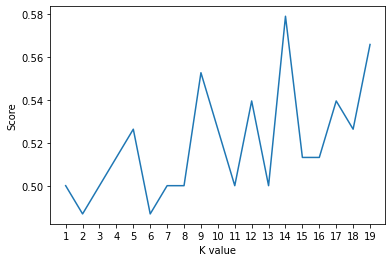

Maksimum nilai KNN adalah 57.89%


In [28]:
#Mencari nilai k yang terbaik
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maksimum nilai KNN adalah {:.2f}%".format(acc))

### Matrik Konfusi KNN

In [29]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[24, 12],
       [27, 13]])

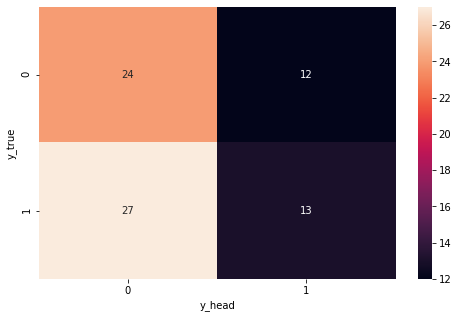

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

#**Perhitungan NB Dengan Scikit Learn**#

In [31]:
#Melihat akurasi
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

prediction_nb = nb.predict(x_test.T)
acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Akurasi Naive Bayes: {:.2f}%".format(acc))

Akurasi Naive Bayes: 26.32%


### Matrik Konfusi NB

In [32]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[24, 12],
       [27, 13]])

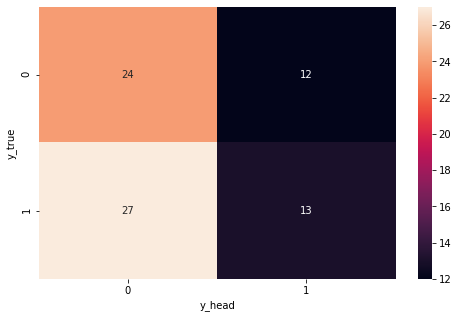

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

#**Perhitungan Random Forest Classifier Dengan Scikit Learn**#

In [34]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 55.26%


#**Perhitungan SVM Dengan Scikit Learn**#

In [35]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 55.26%


#**Perhitungan Multi Layer Perceptron Dengan Scikit Learn**#

In [36]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
MLPC.fit(x_train.T, y_train.T)

acc = MLPC.score(x_test.T,y_test.T)*100

accuracies['MLPC'] = acc
print("MLP Accuracy Score : {:.2f}%".format(acc))

MLP Accuracy Score : 56.58%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#**Perhitungan Linier Discriminant Analysis Dengan Scikit Learn**#

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.T, y_train.T)
acc = lda.score(x_test.T,y_test.T)*100

accuracies['LDA'] = acc
print("LDA Accuracy Score : {:.2f}%".format(acc))

LDA Accuracy Score : 53.95%
